# Período 9

In [59]:
import numpy as np
from datetime import datetime
import requests
import pandas as pd
import matplotlib.pyplot as plt

In [87]:
#url = "http://vps-40d69db1.vps.ovh.ca:22001/api/ExecucaoSimulacaos/melhorValidacaoPeriodoFlat?idPeriodo=9"
url = "http://vps-40d69db1.vps.ovh.ca:22001/api/ExecucaoSimulacaos/melhorValidacaoPeriodoFlatPorTicker?idPeriodo=9&limitePorTicker=3"

In [88]:
r = requests.get(url)
j = r.json()
df = pd.DataFrame.from_dict(j)

In [63]:
df.head(7)

,simulacaoId,ticker,simulacaoResultado,simulacaoLucro,simulacaoPrejuizo,target,stop,tipo,experimentoSimulacaoId,validacaoLucro,validacaoPrejuizo,saldoValidacao
0,11058336,AERI3,44,4,2,0.14,0.08,V,56,1.0,0.0,1.0
1,11058436,AERI3,40,3,1,0.14,0.08,V,56,0.0,0.0,0.0
2,11095236,AERI3,38,2,1,0.18,0.08,V,56,0.0,0.0,0.0
3,11094311,AERI3,38,2,1,0.18,0.08,V,56,0.0,0.0,0.0
4,11098036,AERI3,38,2,1,0.18,0.08,V,56,0.0,0.0,0.0
5,11057866,BKBR3,50,3,0,0.14,0.08,V,56,0.0,0.0,0.0
6,11057891,BKBR3,50,3,0,0.14,0.08,V,56,0.0,0.0,0.0


In [64]:
df['saldoValidacao'].unique()

array([ 1.,  0., -1., nan,  2., -2., -3.])

### Criar dataframe com os errados
### Ir retirando casos até zerar tudo.

In [89]:
print('Total de casos: %d'%(len(df)))

Total de casos: 177


## Montando os que deram errado

In [90]:
dfRuim = df[df['saldoValidacao']<0]

In [91]:
print('Total de casos com erro: %d (%.2f) '%(len(dfRuim) , (100*(len(dfRuim) / len(df)) )))

Total de casos com erro: 50 (28.25) 


In [68]:
dfRuim['simulacaoResultado'].max()

74

In [69]:
df['simulacaoResultado'].max()

74

In [70]:
dfRuim.groupby(['target','stop']).size()

target  stop
0.08    0.06     3
0.10    0.06     5
0.12    0.06     5
        0.08     5
        0.10     5
0.14    0.06    10
        0.08    11
0.16    0.06     5
        0.08     9
0.18    0.08     6
        0.10     2
0.20    0.06    10
        0.10     1
0.22    0.06     5
        0.08     4
dtype: int64

## Trabalhando Target

In [71]:
dfTargetRuim = dfRuim.groupby(['target']).size().reset_index(name ='qtdeRuim')
dfTarget = df.groupby(['target']).size().reset_index(name ='qtde')

In [72]:
dfJoin = pd.merge(dfTarget,dfTargetRuim, how='outer' , left_index=True, right_index=True)

In [73]:
dfJoin.head()

,target_x,qtde,target_y,qtdeRuim
0,0.08,13,0.08,3
1,0.10,47,0.10,5
2,0.12,72,0.12,15
3,0.14,35,0.14,21
4,0.16,51,0.16,14


In [74]:
dfJoin['percentual'] = (dfJoin['qtdeRuim'] / dfJoin['qtde']) * 100

In [75]:
dfJoin.head(20)

,target_x,qtde,target_y,qtdeRuim,percentual
0,0.08,13,0.08,3,23.076923
1,0.10,47,0.10,5,10.638298
2,0.12,72,0.12,15,20.833333
3,0.14,35,0.14,21,60.000000
4,0.16,51,0.16,14,27.450980
5,0.18,30,0.18,8,26.666667
6,0.20,23,0.20,11,47.826087
7,0.22,19,0.22,9,47.368421


<AxesSubplot:xlabel='target_x'>

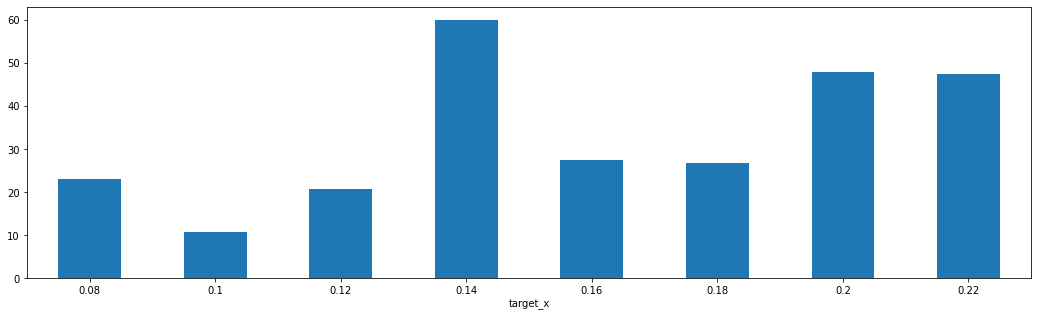

In [76]:
dfJoin.plot.bar(x='target_x', y='percentual', rot=0, figsize=(18,5), legend=None)

## Trabalhando Stop

In [77]:
dfTargetRuim = dfRuim.groupby(['stop']).size().reset_index(name ='qtdeRuim')
dfTarget = df.groupby(['stop']).size().reset_index(name ='qtde')

In [78]:
dfJoin = pd.merge(dfTarget,dfTargetRuim, how='outer' , left_index=True, right_index=True)

In [79]:
dfJoin.head()

,stop_x,qtde,stop_y,qtdeRuim
0,0.06,115,0.06,43.0
1,0.08,143,0.08,35.0
2,0.10,27,0.10,8.0
3,0.12,5,NaN,NaN


In [80]:
dfJoin['percentual'] = (dfJoin['qtdeRuim'] / dfJoin['qtde']) * 100

<AxesSubplot:xlabel='stop_x'>

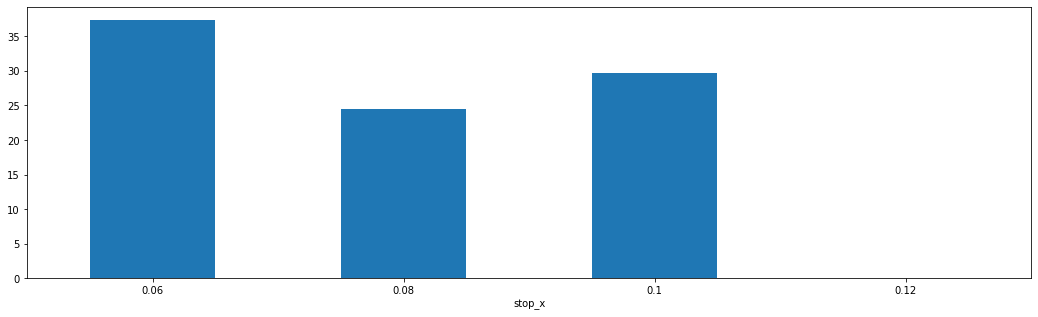

In [81]:
dfJoin.plot.bar(x='stop_x', y='percentual', rot=0, figsize=(18,5), legend=None)

## Por Ticker

In [92]:
dfRuim.head(10)

,simulacaoId,ticker,simulacaoResultado,simulacaoLucro,simulacaoPrejuizo,target,stop,tipo,experimentoSimulacaoId,validacaoLucro,validacaoPrejuizo,saldoValidacao
9,11044815,ANIM3,52,4,0,0.12,0.10,V,56,0.0,1.0,-1.0
10,11044840,ANIM3,52,4,0,0.12,0.10,V,56,0.0,1.0,-1.0
11,11045515,ANIM3,52,4,0,0.12,0.10,V,56,0.0,1.0,-1.0
21,11237611,BPAC11,66,4,0,0.14,0.06,V,57,0.0,1.0,-1.0
22,11237611,BPAC11,66,4,0,0.14,0.06,V,57,0.0,1.0,-1.0
23,11237611,BPAC11,66,4,0,0.14,0.06,V,57,0.0,1.0,-1.0
35,10939389,CIEL3,30,1,0,0.18,0.08,V,54,0.0,1.0,-1.0
36,10895863,CCRO3,36,2,0,0.14,0.08,V,54,0.0,1.0,-1.0
37,10900788,CCRO3,36,2,0,0.14,0.08,V,54,0.0,1.0,-1.0
38,10900363,CCRO3,36,2,0,0.14,0.08,V,54,0.0,1.0,-1.0


In [93]:
dfRuim2 = dfRuim.groupby(['ticker']).size().reset_index(name ='qtde')

In [94]:
dfRuim2.groupby(['qtde']).size()

qtde
1     3
2     4
3    13
dtype: int64